<img src="../imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **Tutorial de Pytorch 5:  t-SNE**

**t-SNE** (t-Distributed Stochastic Neighbor Embedding) es una técnica de **reducción de dimensionalidad** muy popular, especialmente útil para la visualización de conjuntos de datos de alta dimensionalidad. Es particularmente bueno para preservar la estructura local de los datos y puede revelar grupos o patrones ocultos.

## **Ejemplo de uso de t-SNE: dataset Iris**

El siguiente código carga el conjunto de datos Iris. Este dataset está compuesto por 150 ejemplares de tres especies (clases) de Iris (Iris setosa, Iris virginica e Iris versicolor). Cada ejemplar se compone de cuatro características: el largo y ancho del sépalo y el largo y ancho del pétalo. 

Dado que el conjunto se compone de cuatro características, es difícil visualizarlo directamente. Por lo tanto, aplicaremos **t-SNE** para reducirlo a dos dimensiones y luego visualizaremos el resultado. Cada punto en el gráfico representa una flor, y el color indica su especie. La reducción a dos dimensiones permite visualizar aproximadamente cómo las diferentes especies de Iris están distribuidas en el espacio de características original de cuatro dimensiones.

<div align="center">
    <img src="../imgs/iris.png" width="20%">
</div>

/var/folders/gm/03tk2cn52jzgnlz4qchk9s9m0000gn/T/ipykernel_75538/666381201.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('brg', 3))


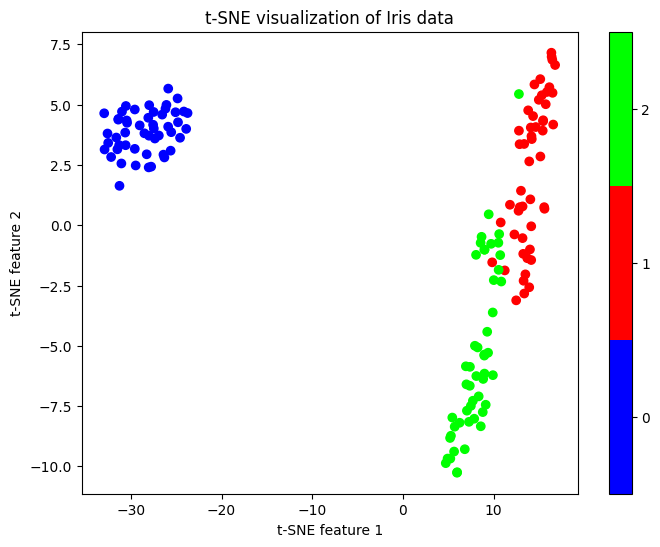

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=25)
X_tsne = tsne.fit_transform(X)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('brg', 3))
plt.colorbar(ticks=range(3))
plt.clim(-0.5, 2.5)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of Iris data')
plt.show()

## **t-SNE en Pytorch (versión simplificada)**

Para probar el método, vamos a crear un dataset formado por tres grupos de puntos generados con distintas localizaciones y varianzas.

In [2]:
import numpy as np
import pandas as pd

C1 = np.random.normal(loc=0., scale=1., size=(10,3))
I1 = np.ones(10, dtype=int)

#C2 = np.random.normal(loc=2., scale=0.1, size=(10,3))
C2 = np.random.normal(loc=5., scale=1., size=(10,3))
I2 = np.ones(10, dtype=int)*2

#C3 = np.random.normal(loc=5, scale=2, size=(10,3))
C3 = np.random.normal(loc=10, scale=1., size=(10,3))
I3 = np.ones(10, dtype=int)*3


df1 = pd.DataFrame(data=C1, columns=["x", "y", "z"])
df1I = pd.DataFrame(data=I1, columns=["class"])

df2 = pd.DataFrame(data=C2, columns=["x", "y", "z"])
df2I = pd.DataFrame(data=I2, columns=["class"])

df3 = pd.DataFrame(data=C3, columns=["x", "y", "z"])
df3I = pd.DataFrame(data=I3, columns=["class"])


result1 = pd.concat([df1, df1I], axis = 1, ignore_index=True, sort=False)
result2 = pd.concat([df2, df2I], axis = 1, ignore_index=True, sort=False)
result3 = pd.concat([df3, df3I], axis = 1, ignore_index=True, sort=False)

df = pd.concat([result1, result2, result3])
df.columns = ["x","y", "z","class"]
df = df.reset_index(drop=True)

df

,x,y,z,class
0,1.088562,0.081685,-0.615182,1
1,0.317381,0.011637,-1.020716,1
2,1.065941,-1.829182,0.876801,1
3,-1.342072,-0.112188,-0.565834,1
4,-0.098484,-0.783979,-0.552237,1
5,-1.935398,-0.476600,-0.269721,1
6,-0.725015,-0.690388,-0.564933,1
7,-0.905432,-0.197979,-0.628067,1
8,-0.406574,-0.575387,1.414199,1
9,-0.876515,0.428104,-0.745518,1


In [3]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.scatter_3d(df, x="x", y="y", z="z", color="class")

fig.update_layout(
    title="Puntos del conjunto Q en el espacio 3D",
    autosize=False,
    width=800,
    height=800)
fig.show()

<code>Q_points</code> será nuestro conjunto de puntos tridimensionales, es decir, el dataset de alta dimensionalidad que queremos visualizar, y <code>P_points</code> será nuestro conjunto de puntos bidimensionales con los que intentaremos visualizar el primer conjunto.

In [4]:
Q_points = df.values[:,0:3]  # Tomamos las coordenadas de los puntos, no la clase
P_points = np.random.uniform(0, 10, size=(30,2))  # Generamos puntos al azar

Si visualizamos el conjunto de puntos bidimensional, veremos que está totalmente desordenado (está generado al azar).

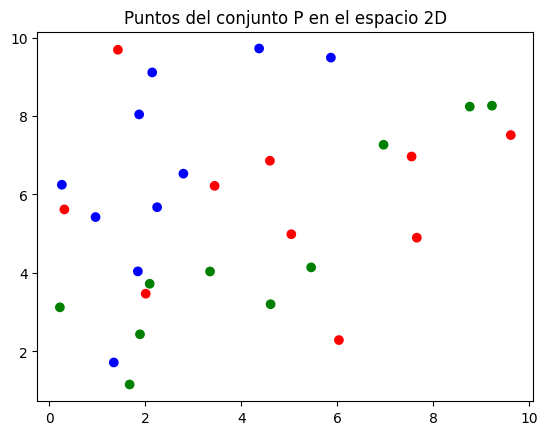

In [5]:
from matplotlib import colormaps
P_index = np.concatenate((np.ones(10, dtype=int), np.ones(10, dtype=int)*2, np.ones(10, dtype=int)*3))

colors = ['red', 'green', 'blue']

plt.title("Puntos del conjunto P en el espacio 2D")
plt.scatter(P_points[:,0], P_points[:,1], c=[colors[i-1] for i in P_index])

Antes de seguir vamos a echarle un vistazo a las matrices de distancia.

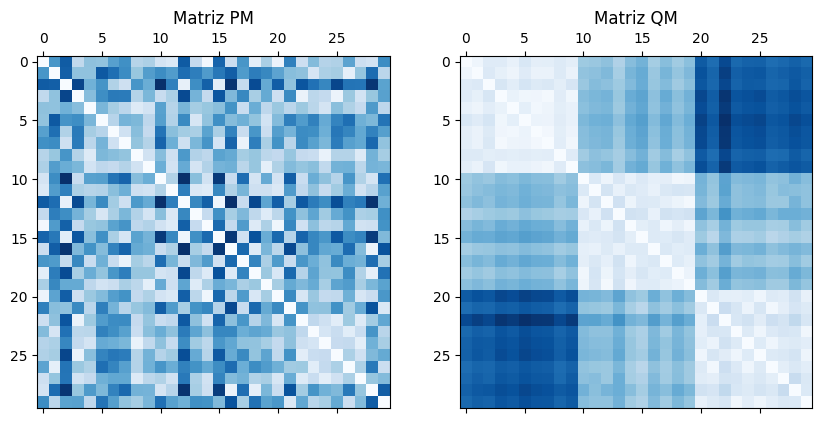

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que P_points y Q_points están definidos correctamente

PM = np.zeros((30,30))
QM = np.zeros((30,30))

def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

for i, p in enumerate(P_points):
    PM[i] = [distance(p, j) for j in P_points]
    
for i, q in enumerate(Q_points):
    QM[i] = [distance(q, j) for j in Q_points]

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Representar la matriz PM en el primer subgráfico
axs[0].matshow(PM, cmap=plt.cm.Blues)
axs[0].set_title('Matriz PM')  # Título para la matriz PM

# Representar la matriz QM en el segundo subgráfico
axs[1].matshow(QM, cmap=plt.cm.Blues)
axs[1].set_title('Matriz QM')  # Título para la matriz QM

# Mostrar la figura
plt.show()


Ahora nos hace falta definir una función para calcular la distancia entre puntos, otra para obtener la **función de distribución de probabilidad** y una última para calcular la **divergencia de Kullback-Leibler**.

In [7]:
import torch
import math

device = 'cuda' if torch.cuda.is_available() else 'cpu'

distT_torch = torch.distributions.studentT.StudentT(df=1, loc=0, scale=1)

def distance(p1, p2):
    return torch.sqrt(torch.sum((p1 - p2)**2) + 1e-6)
    
def pdf(x):
    return torch.exp(distT_torch.log_prob(x))

def KL(p, q):
    return torch.where(q !=0 , p * torch.log(p/q), torch.tensor([0.], dtype=torch.double, device=device)).sum()

Pasamos los puntos creados en Numpy a tensores de PyTorch <code>P</code> y <code>Q</code>. Los puntos <code>P</code> son los que tenemos que "mover", por eso requieren gradiente.

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

P = torch.tensor(P_points, requires_grad=True, dtype=torch.float, device=device)
Q = torch.tensor(Q_points, dtype=torch.float, device=device)

In [9]:
optimizer = torch.optim.RMSprop([P], lr=0.1)

epochs = 500

for k in range(epochs):
    
    PM = torch.tensor(np.zeros((len(P_points), len(P_points))), dtype=float, device=device)
    QM = torch.tensor(np.zeros((len(P_points), len(P_points))), dtype=float, device=device)
    
    for i, q_row in enumerate(Q):
        for j, q_column in enumerate(Q):
            QM[i, j] = distance(q_row, q_column)
    
    QD = pdf(QM)
    QD = torch.div(QD.t(), torch.sum(QD, dim=1)).t()
        
    for i, p in enumerate(P):
        for j, q in enumerate(P):
            PM[i, j] = distance(p, q)

    PD = pdf(PM)
    PD = torch.div(PD.t(), torch.sum(PD, dim=1)).t()
        
    loss = torch.tensor([0.], device=device)
    for pd, qd in zip(PD, QD):
        loss += KL(pd, qd)
    
    if k%20 == 0:
        print("Epoch:", k, "loss:", loss.item())
    

    loss.backward()   
    optimizer.step()    
    optimizer.zero_grad()

Epoch: 0 loss: 39.449462890625
Epoch: 20 loss: 9.733185768127441
Epoch: 40 loss: 8.936274528503418
Epoch: 60 loss: 8.57214641571045
Epoch: 80 loss: 8.311616897583008
Epoch: 100 loss: 7.423149585723877
Epoch: 120 loss: 5.55516242980957
Epoch: 140 loss: 5.4018096923828125
Epoch: 160 loss: 5.322004318237305
Epoch: 180 loss: 5.277534008026123
Epoch: 200 loss: 5.233304500579834
Epoch: 220 loss: 5.208219528198242
Epoch: 240 loss: 5.168604373931885
Epoch: 260 loss: 5.136770248413086
Epoch: 280 loss: 5.0860371589660645
Epoch: 300 loss: 5.018887042999268
Epoch: 320 loss: 4.872486591339111
Epoch: 340 loss: 4.302693843841553
Epoch: 360 loss: 2.4383950233459473
Epoch: 380 loss: 2.2619636058807373
Epoch: 400 loss: 2.2534353733062744
Epoch: 420 loss: 2.2321817874908447
Epoch: 440 loss: 2.2144927978515625
Epoch: 460 loss: 2.1984012126922607
Epoch: 480 loss: 2.1817104816436768


Visualizamos el resultado:

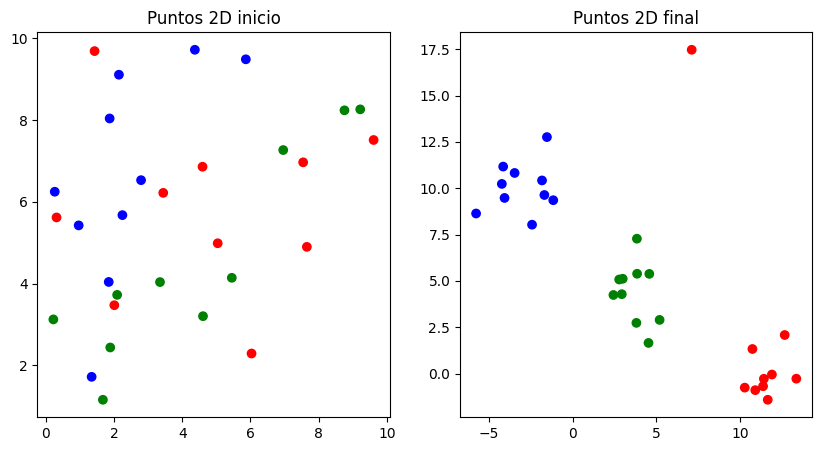

In [11]:
import matplotlib.pyplot as plt

final_points = P.cpu().detach().numpy()
P_index = np.concatenate((np.ones(10, dtype=int), np.ones(10, dtype=int)*2, np.ones(10, dtype=int)*3))

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

colors = ['red', 'green', 'blue']

# Representar la matriz PM en el primer subgráfico
axs[0].scatter(P_points[:,0], P_points[:,1], c=[colors[i-1] for i in P_index])
axs[0].set_title('Puntos 2D inicio')  # Título para la matriz PM

# Representar la matriz QM en el segundo subgráfico
axs[1].scatter(final_points[:,0], final_points[:,1], c=[colors[i-1] for i in P_index])
axs[1].set_title('Puntos 2D final')  # Título para la matriz QM

# Mostrar la figura
plt.show()

---

### Ejercicios

1. Crea el conjunto tridimensional anterior con tres clases con el mismo centro y dispersión. De esa forma, las clases serán no separables. Mira a ver qué ocurre con su visualización con t-SNE.

2. Calcula la visualización t-SNE usando el conjunto de datos IRIS.

---